In [10]:
import numpy as np
import pandas as pd
import theano
from keras.models import Sequential,Model
from keras.layers import Dropout ,Activation,AveragePooling2D, normalization,Convolution2D,MaxPooling2D
from keras.layers import Dense, Flatten, Reshape, Input
from keras.layers.merge import add
from keras import optimizers
from keras.utils import np_utils
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
x = pd.read_csv('/home/vasu/all_projects/ML/MNIST/mnist_kaggle/train.csv')

In [3]:
X = np.array(x)
x = X[:,1:]
y = X[:,0]
print x.shape,y.shape

(42000, 784) (42000,)


In [4]:
x = x/255.0

In [5]:
x = x.reshape((X.shape[0], 28, 28,1))
y = np_utils.to_categorical(y)

In [6]:
inp = Input(shape=(28,28,1))
x1 = Convolution2D( 32,(3,3))(inp)

r1_a1 = Activation('relu')(x1)
r1_w1 = Convolution2D(32,( 3,3),padding='same')(r1_a1)
r1_a2 = Activation('relu')(r1_w1)
r1_d1 = Dropout(0.2)(r1_a2)
r1_w2 = Convolution2D(32,( 3,3),padding='same')(r1_d1)
out1 = add([x1, r1_w2])

x2 = Convolution2D(16,( 3,3))(out1)

r2_a1 = Activation('relu')(x2)
r2_w1 = Convolution2D(16,( 3,3),padding='same')(r2_a1)
r2_a2 = Activation('relu')(r2_w1)
r2_d1 = Dropout(0.2)(r2_a2)
r2_w2 = Convolution2D(16,( 3,3),padding='same')(r2_d1)
out2 = add([x2, r2_w2])

x3 = Convolution2D(8,( 3,3))(out2)
acti = Activation('relu')(x3)
av_pool = MaxPooling2D((2,2))((acti))
f1 = Flatten()(av_pool)
fc1 = Dense(32)(f1)
a1 = Activation('relu')(fc1)
fc3 = Dense(10)(a1)
a3 = Activation('softmax')(fc3)

model = Model(outputs=a3, inputs=inp)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 26, 26, 32)    320         input_1[0][0]                    
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 26, 26, 32)    0           conv2d_1[0][0]                   
____________________________________________________________________________________________________
conv2d_2 (Conv2D)                (None, 26, 26, 32)    9248        activation_1[0][0]               
___________________________________________________________________________________________

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
hist = model.fit(x, y,epochs = 20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 144s - loss: 0.4299 - acc: 0.8648 - val_loss: 0.1331 - val_acc: 0.9586
Epoch 2/20
33600/33600 [==============================] - 135s - loss: 0.1131 - acc: 0.9668 - val_loss: 0.0805 - val_acc: 0.9749
Epoch 3/20
33600/33600 [==============================] - 135s - loss: 0.0798 - acc: 0.9760 - val_loss: 0.0708 - val_acc: 0.9762
Epoch 4/20
33600/33600 [==============================] - 135s - loss: 0.0620 - acc: 0.9808 - val_loss: 0.0592 - val_acc: 0.9821
Epoch 5/20
33600/33600 [==============================] - 135s - loss: 0.0497 - acc: 0.9843 - val_loss: 0.0586 - val_acc: 0.9813
Epoch 6/20
33600/33600 [==============================] - 135s - loss: 0.0437 - acc: 0.9861 - val_loss: 0.0647 - val_acc: 0.9813
Epoch 7/20
33600/33600 [==============================] - 135s - loss: 0.0377 - acc: 0.9882 - val_loss: 0.0585 - val_acc: 0.9827
Epoch 8/20
33600/33600 [========================

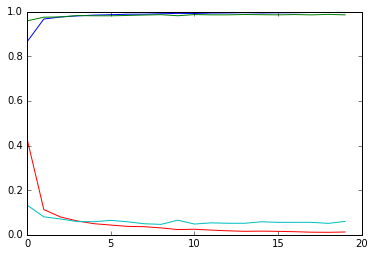

In [12]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])